## Import Libraries

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

## Sin Signal

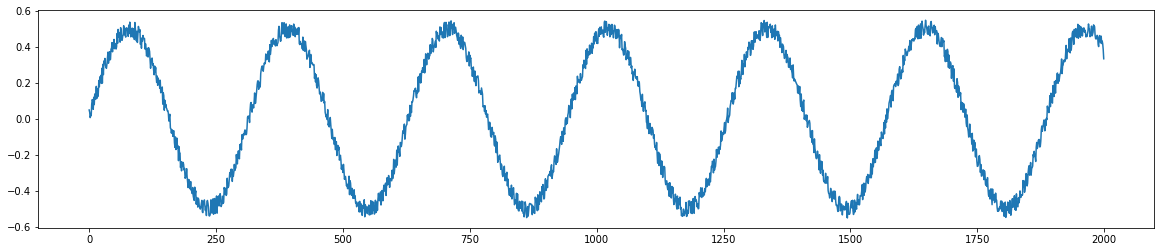

In [2]:
N = 2000
t = np.arange(0,N)
sin_data = np.sin(0.02*t)/2 + np.random.uniform(-0.05,0.05,N)
plt.figure(figsize=(20,4))
plt.plot(sin_data)
plt.show()

## Convert Signal To Dataset

In [3]:
def convertSignalToDataset(signal,step):
    X,Y = [],[]
    for i in range(len(signal)-step):
        j = i+step
        X.append(signal[i:j])
        Y.append(signal[j])
        
    X,Y = np.array(X), np.array(Y)
    return torch.Tensor(X[...,np.newaxis]), torch.Tensor(Y[...,np.newaxis])

In [4]:
X_train = sin_data[:1500]
X_test = sin_data[1500:]

In [5]:
X_train, Y_train = convertSignalToDataset(X_train,15)
X_test , Y_test = convertSignalToDataset(X_test,15)

## Model
## RNN

In [6]:
class RNN(nn.Module):
    def __init__(self,input_size,hidden_size,num_layers,num_classes):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size=input_size,hidden_size=hidden_size,num_layers=num_layers,batch_first=True)
        self.fc = nn.Linear(hidden_size,num_classes)
        
    def forward(self,x):
        h_0 = torch.zeros(self.num_layers,x.size(0),self.hidden_size)
        
        x,_ = self.rnn(x,h_0)
        x = x[:,-1,:]
        x = self.fc(x)
        
        return x

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RNN(input_size=1,hidden_size=64,num_layers=1,num_classes=1).to(device)

In [8]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
loss_function = nn.MSELoss()

In [9]:
for epoch in range(50):
    model.train()
    optimizer.zero_grad()
    predict = model(X_train)
    loss = loss_function(predict,Y_train)
    loss.backward()
    optimizer.step()
    print(f"Epochs: {epoch+1}, Loss: {loss}")

Epochs: 1, Loss: 0.12174434959888458
Epochs: 2, Loss: 0.11371413618326187
Epochs: 3, Loss: 0.1063455268740654
Epochs: 4, Loss: 0.09903986006975174
Epochs: 5, Loss: 0.09152081608772278
Epochs: 6, Loss: 0.0835467129945755
Epochs: 7, Loss: 0.07487259060144424
Epochs: 8, Loss: 0.06527659296989441
Epochs: 9, Loss: 0.05459531024098396
Epochs: 10, Loss: 0.042737118899822235
Epochs: 11, Loss: 0.029677102342247963
Epochs: 12, Loss: 0.01597769930958748
Epochs: 13, Loss: 0.004675950389355421
Epochs: 14, Loss: 0.004789548460394144
Epochs: 15, Loss: 0.019040528684854507
Epochs: 16, Loss: 0.020727623254060745
Epochs: 17, Loss: 0.01258807722479105
Epochs: 18, Loss: 0.004987464752048254
Epochs: 19, Loss: 0.0021582087501883507
Epochs: 20, Loss: 0.003070203121751547
Epochs: 21, Loss: 0.005285201594233513
Epochs: 22, Loss: 0.007310262881219387
Epochs: 23, Loss: 0.008622962981462479
Epochs: 24, Loss: 0.009112811647355556
Epochs: 25, Loss: 0.008786291815340519
Epochs: 26, Loss: 0.007729245815426111
Epochs:

## Predict

In [10]:
model.eval()
pred_train = model(X_train)
pred_train = pred_train.data.numpy()
pred_test = model(X_test)
pred_test = pred_test.data.numpy()
nan_data = np.ones((1500,1)) * np.nan
pred_test = np.concatenate((nan_data,pred_test),axis=0)

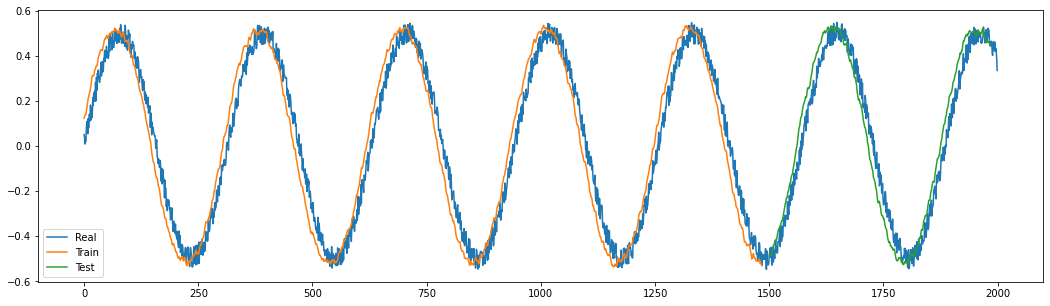

In [11]:
plt.figure(figsize=(18,5))
plt.plot(sin_data,label="Real")
plt.plot(pred_train,label="Train")
plt.plot(pred_test,label="Test")
plt.legend()
plt.show()